In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('spam.csv', encoding="latin-1")
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})
X = df['v2']     
y = df['label']   

In [5]:
df.head()

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) 

In [7]:
X[16]

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_test,y_test)

0.9793365959760739

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.9140837411636759

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel="sigmoid", gamma=1.0)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8346927678085916

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9755301794453507

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9521479064709081

In [14]:
clfs = {
    "NB": mnb,
    "KN": knc, 
    "SVC": svc, 
    'RF': rfc,
    'DT': dtc
    }

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [16]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  NB
Accuracy -  0.9793365959760739
Precision -  0.928
For  KN
Accuracy -  0.9140837411636759
Precision -  1.0
For  SVC
Accuracy -  0.8346927678085916
Precision -  0.3907563025210084
For  RF
Accuracy -  0.9755301794453507
Precision -  1.0
For  DT
Accuracy -  0.9505165851005981
Precision -  0.8709677419354839


In [17]:
performance_df = pd.DataFrame(
    {
        "Algorithm": clfs.keys(),
        "Accuracy": accuracy_scores,
        "Precision": precision_scores,
    }
).sort_values("Precision", ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.914084,1.000000
3,RF,0.975530,1.000000
0,NB,0.979337,0.928000
4,DT,0.950517,0.870968
2,SVC,0.834693,0.390756


In [18]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [19]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.914084
1,RF,Accuracy,0.975530
2,NB,Accuracy,0.979337
3,DT,Accuracy,0.950517
4,SVC,Accuracy,0.834693
5,KN,Precision,1.000000
6,RF,Precision,1.000000
7,NB,Precision,0.928000
8,DT,Precision,0.870968
9,SVC,Precision,0.390756


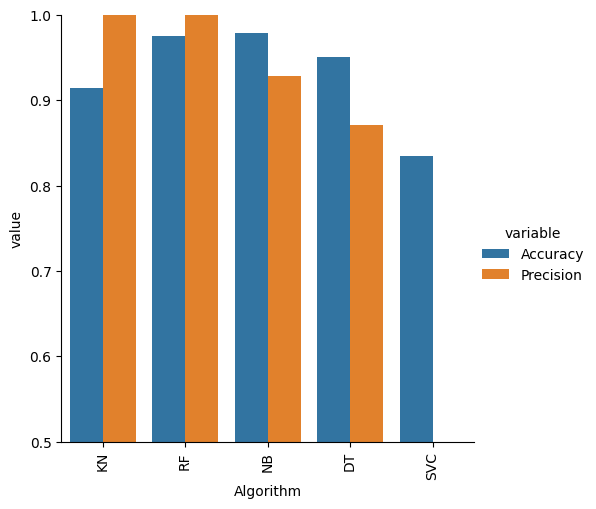

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
svc = SVC(kernel="sigmoid", gamma=1.0, probability=True)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.ensemble import VotingClassifier

In [22]:
voting = VotingClassifier(
    estimators=[("nb", mnb), ("kn", knc),("rf", rfc)], voting="soft"
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('kn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [23]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9760739532354541
Precision 1.0


In [24]:
estimators = [("nb", mnb), ("kn", knc),("rf", rfc)]
final_estimator = RandomForestClassifier()

In [25]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [26]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9842305600870038
Precision 0.9665271966527197


In [27]:
import joblib
joblib.dump(clf, 'NB_spam_model.pkl')

['NB_spam_model.pkl']

In [28]:
NB_spam_model = open('NB_spam_model.pkl','rb')
clf = joblib.load(NB_spam_model)